In [96]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# null hypothesis- one categorical
# from scipy import stats

# F, p = stats.f_oneway(red_wine[red_wine['quality_label'] == 'low']['alcohol'],
# red_wine[red_wine['quality_label'] == 'medium']['alcohol'],
# red_wine[red_wine['quality_label'] == 'high']['alcohol'])
# print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
# print('F Statistic:', F, '\tp-value:', p)

## Data Preparatrion

In [5]:
red_wine_heatmap = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine_heatmap = pd.read_csv('winequality-white.csv', sep=';')

In [6]:
white_wine_heatmap

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [7]:
white_wine_heatmap.drop_duplicates(inplace=True)
red_wine_heatmap.drop_duplicates(inplace=True)
white_wine_heatmap.reset_index(inplace=True)
red_wine_heatmap.reset_index(inplace=True)
red_wine_heatmap.drop(columns='index', inplace=True)
white_wine_heatmap.drop(columns='index', inplace=True)

In [8]:
white_wine_heatmap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 371.5 KB


In [9]:
# add column wine type
red_wine_heatmap['wine type']='red'
white_wine_heatmap['wine type']='white'
wine=pd.concat([red_wine_heatmap, white_wine_heatmap], ignore_index=True)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [10]:
numeric_wine=wine.iloc[:, 0:12]
corr=numeric_wine.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.080092
volatile acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.265205
citric acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.097954
residual sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,-0.056830
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.202137
free sulfur dioxide,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012,0.054002
total sulfur dioxide,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004,-0.050296
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.326434
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,0.039733
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.041884


### Add quality label

In [11]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
wine['quality label'] = wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
wine['quality label'] = pd.Categorical(wine['quality label'],
categories=['low', 'medium', 'high'])
# wine.drop('quality_label',inplace=True, axis=1)

In [12]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type,quality label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,low


In [13]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine_heatmap['quality label'] = red_wine_heatmap['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine_heatmap['quality label'] = pd.Categorical(red_wine_heatmap['quality label'],
categories=['low', 'medium', 'high'])


In [14]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
white_wine_heatmap['quality label'] = white_wine_heatmap['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
white_wine_heatmap['quality label'] = pd.Categorical(white_wine_heatmap['quality label'],
categories=['low', 'medium', 'high'])

# hypothesis check

In [15]:
from scipy import stats

In [16]:
def anova_tests2(df):  
    
    features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
    
    for feature in features:
        F, p = stats.f_oneway(
            df[df['quality label'] == 'low'][feature],
            df[df['quality label'] == 'medium'][feature],
            df[df['quality label'] == 'high'][feature]
        )
        if p > 0.05:
         print(f"ANOVA test for mean {feature} across wine samples with different quality ratings")
         print('F Statistic:', F, '\tp-value:', p)
        else:
         print("there is correlation")

In [17]:
anova_tests2(red_wine_heatmap)


there is correlation
there is correlation
there is correlation
ANOVA test for mean residual sugar across wine samples with different quality ratings
F Statistic: 0.018769916621439144 	p-value: 0.9814053962580443
there is correlation
there is correlation
there is correlation
there is correlation
ANOVA test for mean pH across wine samples with different quality ratings
F Statistic: 0.4933049630979343 	p-value: 0.6107145654590622
there is correlation
there is correlation


In [18]:
anova_tests2(white_wine_heatmap)

there is correlation
there is correlation
ANOVA test for mean citric acid across wine samples with different quality ratings
F Statistic: 0.24868681586895755 	p-value: 0.7798363477964527
there is correlation
there is correlation
ANOVA test for mean free sulfur dioxide across wine samples with different quality ratings
F Statistic: 0.11569157788750334 	p-value: 0.8907529199895233
there is correlation
there is correlation
there is correlation
there is correlation
there is correlation


In [19]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine_heatmap['quality label'] = red_wine_heatmap['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine_heatmap['quality label'] = pd.Categorical(red_wine_heatmap['quality label'],
categories=['low', 'medium', 'high'])

In [20]:
### RED WINE   POSITIVE 
## ALCOHOL
# 1.alcohol shows positive correlation to ph and citric acid
# 2. alcohol has negative corr to density and volatile acidity

## SULPHATES
# 1. sulphates show positive corr with chlorides and citric acid
# 2. sul shows NEG corr to volatile acidity and  ph

### RED WINE   NEGATIVE
# 1. volatile acidity and (total sulfur dioxide and density) 
# 2. volatile acidity is positively corr to pH
# 3. density is pos corr to fixed acidity, citric acid, residual sugar

In [21]:
### WHITE WINE   POSITIVE 
# alcohol and ph
# 1.alcohol POS to pH and NEG to density
# 2.ph is POS to sulphates and NEG to fixed acidity


# white wine negative
#  density and chlorides
# 2. density is POS to residual sugar and NEG to pH (quality and alcohol)
# 3. chlorides = totla sulfur dioxide and density, and NEG to quality alcohol and pH


In [22]:
numeric_white_wine=white_wine_heatmap.iloc[:, 0:13]
corr_white=numeric_wine.corr()
corr_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.080092
volatile acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.265205
citric acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.097954
residual sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,-0.056830
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.202137
free sulfur dioxide,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012,0.054002
total sulfur dioxide,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004,-0.050296
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.326434
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,0.039733
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.041884


In [23]:
import numpy as np

In [24]:
numeric_red_wine=red_wine_heatmap.iloc[:,0:12]
corr_red=numeric_red_wine.corr()
corr_red


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


In [25]:
wine.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type,quality label
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


# Calculate skewness and kurtosis:


In [26]:
#If skewness is less than -1 or greater than 1, the distribution is highly skewed. 
#If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. 
#If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [27]:
print('The skew of the alcohol is:', red_wine_heatmap['alcohol'].astype(float).skew())

The skew of the alcohol is: 0.8598411692032926


In [28]:
print('The skew of the residual sugar is:', red_wine_heatmap['residual sugar'].astype(float).skew())

The skew of the residual sugar is: 4.548153403940447


In [29]:
print('The skew of the pH is:', red_wine_heatmap['pH'].astype(float).skew())

The skew of the pH is: 0.2320322752014824


In [30]:
def skew_check(df):  
    
    features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
    
    for feature in features:
        x=df[feature].astype(float).skew()
        if x > 1 or x < -1:
         print(f'The distribution of {feature} is highly skewed')
        elif x < 1 and x > 0.5:
         print(f'The distribution of {feature} is moderately skewed')
        elif x > -1 and x <-0.5:
         print(f'The distribution of {feature} is moderately skewed')
        else:
         print(f'The distribution of {feature} is symmetricly skewed')
         

In [31]:
skew_results=skew_check(red_wine_heatmap)

The distribution of fixed acidity is moderately skewed
The distribution of volatile acidity is moderately skewed
The distribution of citric acid is symmetricly skewed
The distribution of residual sugar is highly skewed
The distribution of chlorides is highly skewed
The distribution of free sulfur dioxide is highly skewed
The distribution of total sulfur dioxide is highly skewed
The distribution of density is symmetricly skewed
The distribution of pH is symmetricly skewed
The distribution of sulphates is highly skewed
The distribution of alcohol is moderately skewed


In [32]:
def kurt_check(df):  
    
    features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
    
    for feature in features:
        x=df[feature].astype(float).kurt()
        if x == 3:
         print(f'The {feature} has a normal distribution(moderate level of risk)')
        elif x < 3:
         print(f'The {feature} has a distribution which appears as a curve one with long tails (outliers.) (high level a risk)')
        else:
         print(f'The {feature} has a distribution with short tails (outliers.) (stability)')

In [33]:
#111. Mesokurtic (Kurtosis = 3.0) -normal distribution, meaning the extreme value characteristic of the distribution is similar to that 
#of a normal distribution. Therefore, a stock with a mesokurtic distribution generally depicts a moderate level of risk.


#222. Leptokurtic (Kurtosis > 3.0) - This distribution appears as a curve one with long tails (outliers.) 
# #The "skinniness" of a leptokurtic distribution is a consequence of the outliers, which stretch the horizontal axis of
# the histogram graph, making the bulk of the data appear in a narrow ("skinny") vertical range. A stock with a leptokurtic distribution 
# generally depicts a high level of risk but the possibility of higher returns because the stock has typically demonstrated large 
#price movements.


#Platykurtic (Kurtosis < 3.0) - These types of distributions have short tails (fewer outliers.). Platykurtic distributions have demonstrated 
# more stability than other curves because extreme price movements rarely occurred in the past. 
#This translates into a less-than-moderate level of risk.

In [34]:
kurt_check(red_wine_heatmap)

The fixed acidity has a distribution which appears as a curve one with long tails (outliers.) (high level a risk)
The volatile acidity has a distribution which appears as a curve one with long tails (outliers.) (high level a risk)
The citric acid has a distribution which appears as a curve one with long tails (outliers.) (high level a risk)
The residual sugar has a distribution with short tails (outliers.) (stability)
The chlorides has a distribution with short tails (outliers.) (stability)
The free sulfur dioxide has a distribution which appears as a curve one with long tails (outliers.) (high level a risk)
The total sulfur dioxide has a distribution with short tails (outliers.) (stability)
The density has a distribution which appears as a curve one with long tails (outliers.) (high level a risk)
The pH has a distribution which appears as a curve one with long tails (outliers.) (high level a risk)
The sulphates has a distribution with short tails (outliers.) (stability)
The alcohol ha

# Models

## Logistic Regression Mathod

In [35]:
wine.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type,quality label
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [36]:
# we drop quality and quality label from the full dataset
wineLG2=wine.drop('quality', axis=1)
wineLG2=wineLG2.drop('quality label', axis=1)


In [37]:
wineLG2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  wine type             5320 non-null   object 
dtypes: float64(11), object(1)
memory usage: 498.9+ KB


In [38]:
# replacing values
wineLG2['wine type'].replace(['red', 'white'],
                        [0, 1], inplace=True)

In [39]:
wineLG2.head(1500)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6.3,0.36,0.30,4.8,0.049,14.0,85.0,0.9932,3.28,0.39,10.6,1
1496,6.7,0.24,0.35,13.1,0.050,64.0,205.0,0.9970,3.15,0.50,9.5,1
1497,7.0,0.23,0.36,13.0,0.051,72.0,177.0,0.9972,3.16,0.49,9.8,1
1498,8.4,0.27,0.46,8.7,0.048,39.0,197.0,0.9974,3.14,0.59,9.6,1


In [40]:
wineLG3=wineLG2.copy()

In [41]:
wineLG3.head(1500)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6.3,0.36,0.30,4.8,0.049,14.0,85.0,0.9932,3.28,0.39,10.6,1
1496,6.7,0.24,0.35,13.1,0.050,64.0,205.0,0.9970,3.15,0.50,9.5,1
1497,7.0,0.23,0.36,13.0,0.051,72.0,177.0,0.9972,3.16,0.49,9.8,1
1498,8.4,0.27,0.46,8.7,0.048,39.0,197.0,0.9974,3.14,0.59,9.6,1


In [42]:
#importm library for dicidint the dataset into two 
from sklearn.model_selection import train_test_split

In [43]:
wineLG3.drop(columns='wine type', inplace=True)

In [44]:
X=wineLG3

In [45]:

y = wineLG2['wine type']  # --> what you're trying to predict
  # --> the features we will keep to build our model





In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [47]:
y_test.shape

(1064,)

In [48]:
#building model Logistic Regression

from sklearn.linear_model import LogisticRegression

In [49]:
lr_model=LogisticRegression(random_state=52)

In [50]:
#fit the model
lr_model.fit(X_train, y_train)

c:\Users\gabb_\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=52)

In [51]:
# prediction
preds= lr_model.predict(X_test)

In [52]:
preds

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
acc=accuracy_score(y_test, preds)
acc

0.974624060150376

## Random Forest model

In [55]:
from sklearn.ensemble import RandomForestClassifier


In [56]:
RF_model= RandomForestClassifier(n_estimators= 100, criterion='entropy', random_state=445)

In [57]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=445)

In [58]:
preds2= RF_model.predict(X_test)

In [59]:
preds2

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [60]:
acc=accuracy_score(y_test, preds2)
acc

0.9962406015037594

## Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression

In [75]:
lir_model=LinearRegression()

training the model

In [77]:
lir_model.fit(X_train, y_train)

LinearRegression()

applying the model

In [81]:
y_lir_train_pred=lir_model.predict(X_train)
y_lir_test_pred=lir_model.predict(X_test)

In [82]:
y_lir_train_pred

array([-0.0174073 ,  0.20152234,  1.0497232 , ..., -0.07717198,
        0.12401757,  0.87985245])

In [83]:
y_lir_test_pred

array([1.07781262, 1.01974384, 0.96845762, ..., 0.11158806, 1.21058961,
       0.96218071])

Evaluate model preformance

In [87]:
#we want to compare y_train and the y_lir_train_pred -the predicted value
y_train

521     0
757     0
4435    1
3342    1
4117    1
       ..
4149    1
1890    1
350     0
79      0
3927    1
Name: wine type, Length: 4256, dtype: int64

In [85]:
y_lir_train_pred

array([-0.0174073 ,  0.20152234,  1.0497232 , ..., -0.07717198,
        0.12401757,  0.87985245])

In [89]:
from sklearn.metrics import mean_squared_error, r2_score
lir_model_train_mse=mean_squared_error(y_train, y_lir_train_pred)
lir_model_train_r2=r2_score(y_train, y_lir_train_pred)

lir_model_test_mse=mean_squared_error(y_test, y_lir_test_pred)
lir_model_test_r2=r2_score(y_test, y_lir_test_pred)

In [95]:
print('LR MSE (Train):', lir_model_train_mse)
print('LR R2 (Train):', lir_model_train_r2)
print('LR MSE (TEST):', lir_model_test_mse)
print('LR R2 (TEST):', lir_model_test_r2)

LR MSE (Train): 0.02742375273615394
LR R2 (Train): 0.8548253686956633
LR MSE (TEST): 0.026810948604945328
LR R2 (TEST): 0.862672356850354


In [103]:
lir_results=pd.DataFrame(['Linear Regression', lir_model_train_mse, lir_model_train_r2, lir_model_test_mse, lir_model_test_r2]).transpose()
lir_results.columns=['Method', 'Trainning MSE', 'Training R2', 'Testing MSE', 'Testing R2']
lir_results



,Method,Trainning MSE,Training R2,Testing MSE,Testing R2
0,Linear Regression,0.027424,0.854825,0.026811,0.862672


Data visualization of prediction results

[]

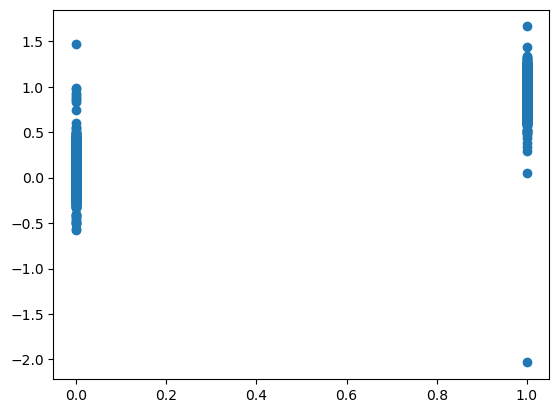

In [105]:
plt.scatter(x=y_train, y=y_lir_train_pred)
plt.plot()

# Standardisation and Normalisation

- Nomralisation rescales the values om range [0,1] (MinMaxScaler)- when the data is SKEWED
- Standardisation - it rescales data with mean 0 and std 1 (StandardScaler is bad when having outliers, RobustScaler works with 1st and 3rd quartiles and not the mean and the variance scaling) - when there is a NORMAL DISTRIBUTION

In [61]:
## data normalisation with sklearn
#from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
#norm = MinMaxScaler().fit(X_train)

# transform training data
#X_train_norm = norm.transform(X_train)

# transform testing data
#X_test_norm = norm.transform(X_test)

# Function for finding outliers

In [62]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [63]:
find_outliers_IQR(wineLG2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine type
0,NaN,0.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Drop outliers

In [67]:
# Drop the outliers
# Using this method, we essentially drop all the outliers from the data,
# excluding them from the analysis and modeling. Although this technique is quick and easy, 
# it isn’t always the right solution and can reduce the amount of data if there are a lot of outliers present.
# For example, using the IQR method to identify the outliers, we will lose 17,167 rows. 

# Copy and paste the find_outliers_IQR function so we can modify it to return a dataframe with the outliers removed.
# Rename it drop_outliers_IQR. Inside the function we create a dataframe named not_outliers that replaces the outlier values with a NULL. 
# Then we can use .dropna(), to drop the rows with NULL values. 

In [64]:
def drop_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   outliers_dropped = outliers.dropna().reset_index()

   return outliers_dropped

## Cap the outliers

In [68]:
# In this technique, we essentially set a limit for the min and max outlier values. 
# Anything above or below the cap gets set to the capped min or max respectively. 
# For example, if we set the cap max for fare_amount at 20, any outlier above 20 will be set to 20. 
# This technique is used when you can assume that all outliers express the same behaviors or patterns,
# meaning the model wouldn’t learn anything new by allowing the outliers to remain. 

# To cap the outliers, calculate a upper limit and lower limit. For the upper limit,
# we will use the mean plus three standard deviations. For the lower limit, we will calculate it as the mean minus 3 standard deviations. 
# Keep in mind, the calculation you use can depend on the data’s distribution. 

In [71]:
# upper_limit = df[‘fare_amount’].mean() + 3*df[‘fare_amount’].std()

# print(upper_limit)

# lower_limit = df[‘fare_amount’].mean() – 3*df[‘fare_amount’].std()

# print(lower_limit)
# After calculating the upper and lower limit, we use the numpy .where() function to apply the limits to fare_amount. 

# df[‘fare_amount’] = np.where(df[‘fare_amount’] > upper_limit,

   # upper_limit,

   # np.where(

       # df[‘fare_amount’] < lower_limit,

       # lower_limit,

       # df[‘fare_amount’]

  # )

#)

# We can use .describe() to verify the min and max values have been capped as expected:

# df.describe()[[‘fare_amount’]]

## Replace outliers using imputation as if they were missing values

In [72]:
#The third technique for handling outliers is similar to capping the values. 
#Instead of using a capping calculation, use whatever imputation technique is being used on the missing values.
# For example, if the fare_amount column had missing values, we might find it appropriate to fill in the missing values using the mean. 
#Since that is how we treat the missing values, we would do the same thing for the outliers. 

#Use a function to find the outliers using IQR and replace them with the mean value. 
#Name it impute_outliers_IQR. In the function, we can get an upper limit and a lower limit using the .max() and .min() functions respectively.
# Then we can use numpy .where() to replace the values like we did in the previous example.

# def impute_outliers_IQR(df):

  # q1=df.quantile(0.25)

   #q3=df.quantile(0.75)

   #IQR=q3-q1

   #upper = df[~(df>(q3+1.5*IQR))].max()

   #lower = df[~(df<(q1-1.5*IQR))].min()

   #df = np.where(df > upper,

    #   df.mean(),

     #  np.where(

      #     df < lower,

       #    df.mean(),

        #   df

         #  )

      # )

  # return df

# We can pass fare_amount through the impute_outliers_IQR function to transform the outliers into the mean value. 
# We can use .describe() to verify the function works.

# df[‘fare_amount’] = impute_outliers_IQR(df[‘fare_amount’])

# df.describe()[‘fare_amount’]